In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [125]:
def plot_subplot(axs, data, min_y, max_y, plot_row, plot_column, line_color, gap, vline_index=None, y_label=False, y_axis_color=None, px_size=0.1625):

    
    if y_label: axs[plot_row,plot_column].set_ylabel(y_label, labelpad=10, color=y_axis_color)
    else: axs[plot_row,plot_column].axes.yaxis.set_visible(False)
    
    if (plot_row==0): axs[plot_row,plot_column].axes.xaxis.set_visible(False)

    if gap:
        x_axis = (np.arange(0, len(data))-vline_index)*px_size
        axs[plot_row,plot_column].vlines(0, min_y-0.1*max_y, max_y+0.1*max_y, color="black", linewidth=plt.rcParams['axes.linewidth'])
    else: x_axis = (np.arange(0, len(data))-len(data)/2)*px_size

    axs[plot_row,plot_column].plot(x_axis, data.Value, linewidth=plt.rcParams['axes.linewidth']*2, color=line_color, alpha=1)
    axs[plot_row,plot_column].set_ylim([min_y-0.1*max_y, max_y+0.1*max_y])
        


In [129]:
def plot_profiles(folder, channels, colors, COLOR, sec_axis=False, save=False, title="", plot_size="big", posterior_gap=True):
    px_size=0.1625

    # Edit the font, font size, color and axes width
    
    if plot_size == "small":
        plt.rcParams['font.size'] = 8
        plt.rcParams['axes.linewidth'] = 0.3
        fig_width=1.5
        fig_height=1.5
        tick_size=3
        
    else:
        plt.rcParams['font.size'] = 18
        plt.rcParams['axes.linewidth'] = 1
        fig_width=5
        fig_height=4
        tick_size=7

    
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['axes.edgecolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR

    # Make text editable in illustrator
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42


    fig, axs = plt.subplots(2, 2, figsize=(fig_width, fig_height))
    
    # Edit the major and minor ticks of the x and y axes
    for ax in axs.flat:
        ax.xaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
        ax.xaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
        ax.yaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')
        ax.yaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')


    
    channels = ["C2_Magenta", "C3_Grays"]
    magenta  = sns.color_palette()[-4]
    gray = sns.color_palette()[-3]
    yellow = sns.color_palette()[-2]

    yellow_posterior = pd.read_csv(folder+"/"+folder+".tif_C1_Yellow_posterior.csv").iloc[::-1].reset_index(drop=True)
    yellow_lateral = pd.read_csv(folder+"/"+folder+".tif_C1_Yellow_lateral.csv").iloc[::-1].reset_index(drop=True)
    
    magenta_posterior = pd.read_csv(folder+"/"+folder+".tif_C2_Magenta_posterior.csv").iloc[::-1].reset_index(drop=True)
    magenta_lateral = pd.read_csv(folder+"/"+folder+".tif_C2_Magenta_lateral.csv").iloc[::-1].reset_index(drop=True)

    gray_posterior = pd.read_csv(folder+"/"+folder+".tif_C3_Grays_posterior.csv").iloc[::-1].reset_index(drop=True)
    gray_lateral = pd.read_csv(folder+"/"+folder+".tif_C3_Grays_lateral.csv").iloc[::-1].reset_index(drop=True)

    max_yellow = max(max(yellow_lateral.Value), max(yellow_posterior.Value))
    max_magenta = max(max(magenta_lateral.Value), max(magenta_posterior.Value))
    max_gray = max(max(gray_lateral.Value), max(gray_posterior.Value))
    
    min_yellow = min(min(yellow_lateral.Value), min(yellow_posterior.Value))
    min_magenta = min(min(magenta_lateral.Value), min(magenta_posterior.Value))
    min_gray = min(min(gray_lateral.Value), min(gray_posterior.Value))

    min_magenta_lateral = magenta_lateral[magenta_lateral.Value == min(magenta_lateral.iloc[20:-20].Value)]
    min_magenta_lateral = min_magenta_lateral.index[0]
    min_magenta_posterior = magenta_posterior[magenta_posterior.Value == min(magenta_posterior.iloc[20:-20].Value)]

    min_magenta_posterior = min_magenta_posterior.index[0]
    

    #lateral magenta
    plot_subplot(axs, magenta_lateral, min_magenta, max_magenta, 1, 0, line_color = magenta, gap=True, vline_index=min_magenta_lateral, y_label="Jupiter", y_axis_color=magenta)
    
    #lateral trans
    ax2 = axs[1,0].twinx()
    x_axis = (np.arange(0, len(gray_lateral))-min_magenta_lateral)*px_size
    ax2.plot(x_axis, gray_lateral.Value, linewidth=plt.rcParams['axes.linewidth']*2, color=gray, alpha=1)
    ax2.axes.yaxis.set_visible(False)
    ax2.set_ylim([min_gray-0.1*max_gray, max_gray+0.1*max_gray])
    
    #lateral bazooka
    plot_subplot(axs, yellow_lateral, min_yellow, max_yellow, 0, 0, line_color = yellow, gap=True, vline_index=min_magenta_lateral, y_label="Bazooka", y_axis_color=yellow)


    #posterior magenta
    plot_subplot(axs, magenta_posterior, min_magenta, max_magenta, 1, 1, line_color = magenta, gap=posterior_gap, vline_index=min_magenta_posterior, y_label=None)
    
    #posterior trans
    ax2 = axs[1,1].twinx()
    if posterior_gap: x_axis = (np.arange(0, len(gray_posterior))-min_magenta_posterior)*px_size
    else: x_axis = (np.arange(0, len(gray_posterior))-len(magenta_posterior)/2)*px_size
    ax2.plot(x_axis, gray_posterior.Value, linewidth=plt.rcParams['axes.linewidth']*2, color=gray, alpha=1)
    ax2.set_ylim([min_gray-0.1*max_gray, max_gray+0.1*max_gray])
    ax2.set_ylabel('TL', labelpad=10, color=gray)

    #posterior bazooka
    plot_subplot(axs, yellow_posterior, min_yellow, max_yellow, 0, 1, line_color = yellow, gap=posterior_gap, vline_index=min_magenta_lateral, y_label=None)






    ax2.spines['right'].set_color(gray)
    ax2.tick_params(axis='y', colors=gray)

    axs[0,0].spines['left'].set_color(yellow)
    axs[0,0].tick_params(axis='y', colors=yellow)

    axs[1,0].spines['left'].set_color(magenta)
    axs[1,0].tick_params(axis='y', colors=magenta)

    fig.text(0.5, -0.1, r'Position ($\mathregular{\mu}$m)', ha='center')


    if save==True:
        fig.savefig(f'{title}_{COLOR}_{plot_size}.pdf', dpi=300, transparent=True, bbox_inches='tight')
        fig.savefig(f'{title}_{COLOR}_{plot_size}.png', dpi=300, transparent=True, bbox_inches='tight')
    

    

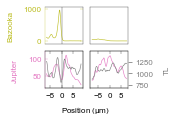

In [134]:

posterior_gap = True
folder = "stage10B_Gap_Bazooka"
folder = "stage11"
folder = "stage10B_Gap_noBazooka"

posterior_gap = False
folder = "stage10A"
folder = "stage10B_noGap_noBazooka"

channels = ["C1_Yellow", "C2_Magenta", "C3_Grays"]
positions = ["posterior", "lateral"]
colors = [sns.color_palette()[-2], sns.color_palette()[-4], sns.color_palette()[-3]]
COLOR = "black"
plot_profiles(folder, channels, colors, COLOR, sec_axis=True, save=True, title=folder+"_cross_section", plot_size="small", posterior_gap = posterior_gap)